In [520]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('./data/tradelog_IS.csv', index_col = 0)

In [521]:
df['open_time_fmt'] = pd.to_datetime(df['open_time']).dt.time

In [522]:
df = df[df['open_time'] < '2023-05-31']

Text(0, 0.5, 'No. of Trades')

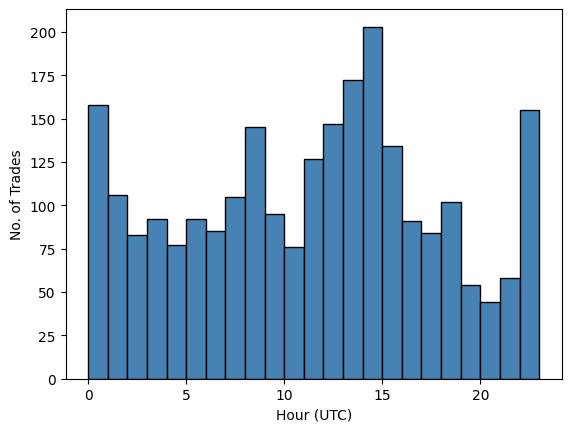

In [523]:
data = pd.to_datetime(df['open_time']).dt.hour
bin_width = 1
bins = np.arange(min(data), max(data) + bin_width, bin_width)
plt.hist(pd.to_datetime(df['open_time']).dt.hour, bins = bins, color='steelblue', edgecolor = 'black')


plt.xlabel('Hour (UTC)')
plt.ylabel('No. of Trades')
# plt.text(18,290,'USDJPY (IS)\nAll Entry Signals')
# plt.text(1.15,180,'Tokyo Open', rotation = 90)
# plt.text(5.5,180,'Sydney Close', rotation = 90)
# plt.text(7.5,220,'London Open', rotation = 90)
# plt.text(13.25,220,'NYC Open', rotation = 90)
# plt.text(20.5,100,'NYC Close', rotation = 90)
# plt.text(20.75,190,'Sydney Open', rotation = 90)

In [524]:
df['time_in_trade'] = (pd.to_datetime(df['close_time']) - pd.to_datetime(df['open_time']))/pd.Timedelta(hours = 1)
print('mode: ',df['time_in_trade'].mode())
print('mean: ',df['time_in_trade'].mean())
print('median: ',df['time_in_trade'].median())
# plt.hist(pd.to_datetime(df['open_time']).dt.hour, bins = 24)

mode:  0    0.083333
Name: time_in_trade, dtype: float64
mean:  38.754292421193824
median:  23.583333333333332


(array([139.,  95., 120., 131., 113.,  96.,  92., 101.,  60.,  86.,  86.,
        120.,  79.,  59.,  56.,  38.,  42.,  26.,  25.,  20.,  21.,  31.,
         27.,  42.,  29.,  19.,  24.,  24.,  28.,  30.,  40.,  23.,  33.,
         23.,  30.,   9.,  20.,  17.,  17.,  22.,  20.,  22.,  11.,   6.,
         13.,   8.,  18.,  17.,  18.,  15.,   9.,  19.,   9.,  13.,  27.,
         33.,  13.,  11.,  13.,   1.,   7.,   4.,   0.,   3.,   5.,   3.,
          2.,   4.,   0.,   0.,   0.,   2.,   2.,   5.,   3.,   5.,   3.,
          2.,   0.,   3.,   0.,  11.,   0.,   1.,   8.,   3.,   5.,   0.,
          2.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          8.]),
 array([8.33333333e-02, 2.03583333e+00, 3.98833333e+00, 5.94083333e+00,
        7.89333333e+00, 9.84583333e+00, 1.17983333e+01, 1.37508333e+01,
        1.57033333e+01, 1.76558333e+01, 1.96083333e+01, 2.15608333e+01,
        2.35133333e+01, 2.54658333e+01, 2.74183333e+01, 2.93708333e+01,
        3.13233333e+01, 3.3275

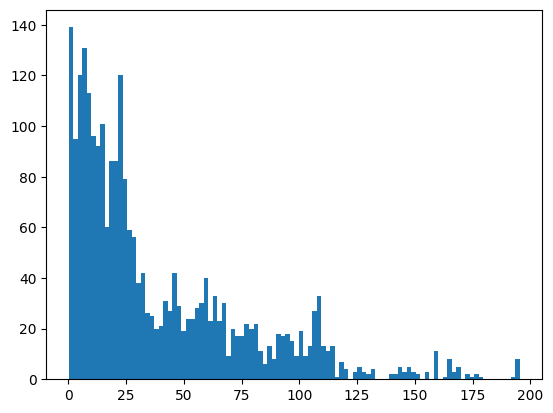

In [525]:
plt.hist(df['time_in_trade'], bins = 100)

In [526]:
hourly_summary = pd.DataFrame(index = [i for i in range(24)],columns = ['win_rate', 'PnL', 'no_trades','ATT_wins', 'ATT_losses'])



In [527]:
for h in hourly_summary.index:
    # print(h)
    dg = df[pd.to_datetime(df['open_time']).dt.hour == h]
    no_trades = len(dg)
    wins = len(dg[dg['PnL']>0])
    
    de = dg[dg['PnL']>0]
    db = dg[dg['PnL']<0]
    
    PnL = dg['PnL'].sum()
    dg

    if no_trades == 0:
        hourly_summary.loc[h,'win_rate'] = 0
    else:
        hourly_summary.loc[h,'win_rate'] = wins/no_trades
    
    hourly_summary.loc[h,'PnL']     = PnL
    hourly_summary.loc[h,'no_trades'] = no_trades

    hourly_summary.loc[h,'ATT_wins'] = de['time_in_trade'].median()
    hourly_summary.loc[h,'ATT_losses'] = db['time_in_trade'].median()


for h in hourly_summary.index:
    # print(h)
    dg = df[pd.to_datetime(df['open_time']).dt.hour == h]
    no_trades = len(dg)
    hourly_summary.loc[h,'prob_hr']     =  no_trades/hourly_summary['no_trades'].sum()
    hourly_summary.loc[h,'EV_hr']       = hourly_summary.loc[h,'prob_hr']*hourly_summary.loc[h,'PnL']





In [528]:
hourly_summary

,win_rate,PnL,no_trades,ATT_wins,ATT_losses,prob_hr,EV_hr
0,0.537975,3.425345,158,24.916667,24.416667,0.063581,0.217789
1,0.518868,-1.658505,106,26.666667,25.25,0.042656,-0.070745
2,0.433735,-16.339424,83,19.416667,17.25,0.033400,-0.545743
3,0.554348,6.160606,92,11.916667,10.333333,0.037022,0.228079
4,0.558442,5.430891,77,20.416667,20.5,0.030986,0.168281
5,0.478261,-8.280621,92,18.833333,22.25,0.037022,-0.306566
6,0.505882,-2.766454,85,25.916667,21.958333,0.034205,-0.094627
7,0.504762,-4.832538,105,23.0,25.791667,0.042254,-0.204192
8,0.544828,3.169712,145,25.833333,29.333333,0.058350,0.184953
9,0.536842,1.614225,95,28.333333,27.583333,0.038229,0.061711


34


(array([8., 1., 5., 1., 1., 0., 0., 3., 1., 0., 2., 2., 0., 0., 3., 0., 0.,
        0., 1., 6.]),
 array([  0.58333333,   5.93333333,  11.28333333,  16.63333333,
         21.98333333,  27.33333333,  32.68333333,  38.03333333,
         43.38333333,  48.73333333,  54.08333333,  59.43333333,
         64.78333333,  70.13333333,  75.48333333,  80.83333333,
         86.18333333,  91.53333333,  96.88333333, 102.23333333,
        107.58333333]),
 <BarContainer object of 20 artists>)

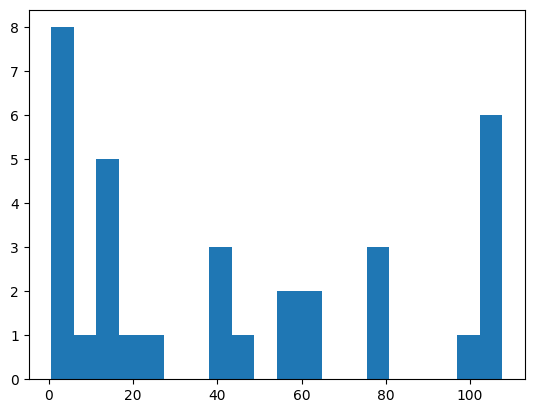

In [529]:
hour = 21
dh = df[pd.to_datetime(df['open_time']).dt.hour == hour]
dh = dh[dh['PnL']>0]
print(len(dh))
plt.hist(dh['time_in_trade'],bins = 20)

<BarContainer object of 24 artists>

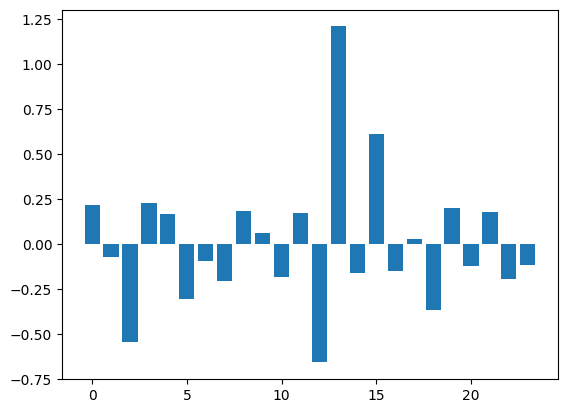

In [530]:
plt.bar(hourly_summary.index,hourly_summary['EV_hr'])

In [531]:
int(df['time_in_trade'].max())

195

In [532]:

time_in_trade_summary = pd.DataFrame(index = [i for i in range(int(df['time_in_trade'].max()+1)) ], columns = ['win_rate','PnL','no_trades','prob','EV(t)'])

for h in time_in_trade_summary.index:
    # print(h)
    dg = df[df['time_in_trade'].astype(int) == h]
    # print(dg)

    no_trades = len(dg)
    wins = len(dg[dg['PnL']>0])
    PnL = dg['PnL'].sum()

    if no_trades == 0:
        time_in_trade_summary.loc[h,'win_rate'] = 0
    else:
        time_in_trade_summary.loc[h,'win_rate'] = wins/no_trades
    
    time_in_trade_summary.loc[h,'PnL']     = PnL
    time_in_trade_summary.loc[h,'no_trades'] = no_trades
    

for h in time_in_trade_summary.index:
    no_trades = time_in_trade_summary.loc[h,'no_trades']
    time_in_trade_summary.loc[h,'prob'] = no_trades/time_in_trade_summary['no_trades'].sum()

for h in time_in_trade_summary.index:
    dg = time_in_trade_summary[time_in_trade_summary.index >= h]
    time_in_trade_summary.loc[h,'EV(t)'] = (dg['prob']*dg['PnL']).sum()

In [533]:
t = time_in_trade_summary[time_in_trade_summary['no_trades']!= 0]
time_in_trade_summary.head(20)

,win_rate,PnL,no_trades,prob,EV(t)
0,0.7,12.992962,80,0.032193,0.2844
1,0.576923,2.891736,52,0.020926,-0.133885
2,0.568627,2.585111,51,0.020523,-0.194396
3,0.529412,0.331733,51,0.020523,-0.247451
4,0.553846,2.339402,65,0.026157,-0.254259
5,0.581818,6.050797,55,0.022133,-0.315451
6,0.540984,1.310267,61,0.024547,-0.449372
7,0.520548,-0.90719,73,0.029376,-0.481535
8,0.484375,-5.17386,64,0.025755,-0.454885
9,0.55102,2.376952,49,0.019718,-0.321635


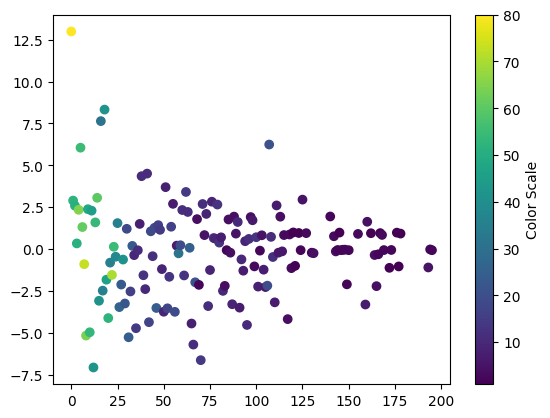

In [534]:
fig = plt.scatter(t.index,t['PnL'],c = t['no_trades'])
colorbar = plt.colorbar(fig)
colorbar.set_label('Color Scale')

<BarContainer object of 60 artists>

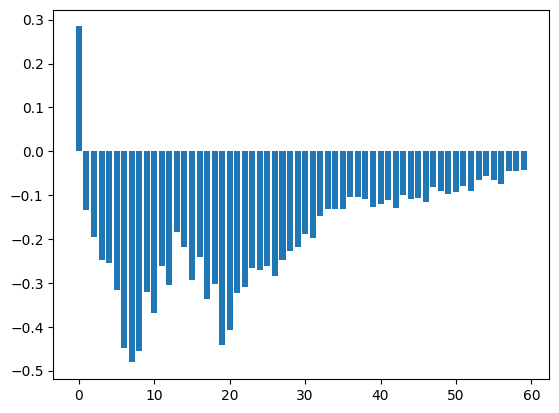

In [535]:
plt.bar(time_in_trade_summary.head(60).index,time_in_trade_summary['EV(t)'].head(60))

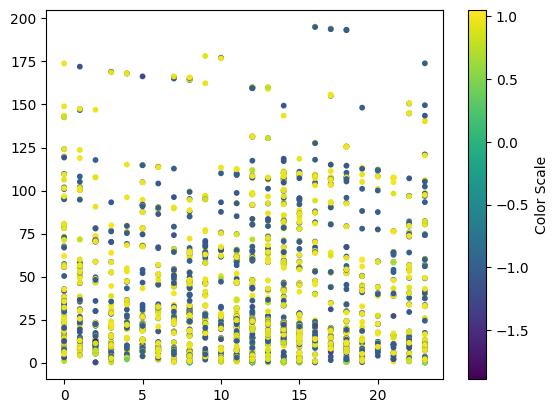

In [536]:
f =plt.scatter(pd.to_datetime(df['open_time']).dt.hour, df['time_in_trade'], s = 10,c = df['PnL'], marker= 'o')
colorbar = plt.colorbar(f)
colorbar.set_label('Color Scale')

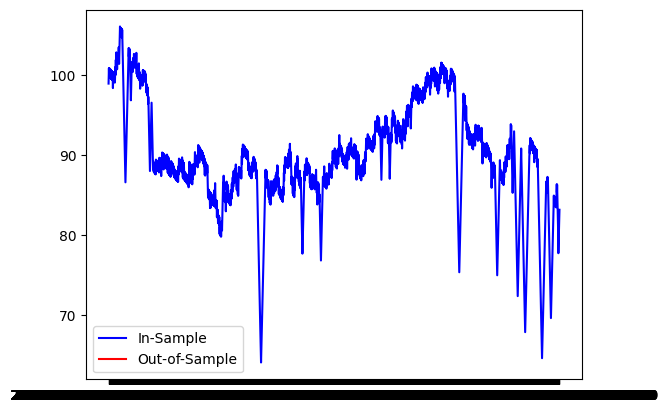

In [537]:
IS_df = df[df['open_time'] < '2023-05-31']
OS_df = df[df['open_time'] >= '2023-05-31']

plt.plot(IS_df['open_time'],IS_df['account_balance(t)'],label='In-Sample',color = 'blue')
plt.plot(OS_df['open_time'],OS_df['account_balance(t)'],label='Out-of-Sample',color = 'red')
plt.legend()

In [538]:
df['date'] =  pd.to_datetime(df['open_time']).dt.date
df['week_no'] = (pd.to_datetime(df['open_time']).dt.isocalendar()['week'])
df['month'] = (pd.to_datetime(df['open_time']).dt.month)
df['year'] = (pd.to_datetime(df['open_time']).dt.year)

In [539]:
# risk-return statistics
index = ['Daily', 'Weekly','Monthly']
columns = ['maxDD','Sharpe','E_returns', 'CumGrowthRate', 'vol']

perfomance_summary = pd.DataFrame(index = index, columns = columns)

In [540]:
s = ['date','week_no','month']
t = {'date':'Daily', 'week_no':'Weekly', 'month':'Monthly'}

#Daily
stats = df.groupby(by = 'date' ).agg(PnL = ('PnL','first'),\
                                        start_acc = ('account_balance(t)','first'),\
                                        end_acc = ('account_balance(t)','last'))
# print(stats)
    
stats['start_acc'] = stats['start_acc'] - stats['PnL']
stats['abs_return_pct'] = (stats['end_acc'] - stats['start_acc'])/stats['start_acc']

perfomance_summary.loc['Daily', 'maxDD'] = stats['abs_return_pct'].min()
perfomance_summary.loc['Daily', 'E_returns'] = stats['abs_return_pct'].mean()
perfomance_summary.loc['Daily', 'vol'] = stats['abs_return_pct'].std()



#Weekly
stats = df.groupby(by = ['year','week_no'] ).agg(PnL = ('PnL','first'),\
                                        start_acc = ('account_balance(t)','first'),\
                                        end_acc = ('account_balance(t)','last'))


stats['start_acc'] = stats['start_acc'] - stats['PnL']
stats['abs_return_pct'] = (stats['end_acc'] - stats['start_acc'])/stats['start_acc']

perfomance_summary.loc['Weekly', 'maxDD'] = stats['abs_return_pct'].min()
perfomance_summary.loc['Weekly', 'E_returns'] = stats['abs_return_pct'].mean()
perfomance_summary.loc['Weekly', 'vol'] = stats['abs_return_pct'].std()



#Monthly
stats = df.groupby(by = ['year','month'] ).agg(PnL = ('PnL','first'),\
                                        start_acc = ('account_balance(t)','first'),\
                                        end_acc = ('account_balance(t)','last'))


stats['start_acc'] = stats['start_acc'] - stats['PnL']
stats['abs_return_pct'] = (stats['end_acc'] - stats['start_acc'])/stats['start_acc']


perfomance_summary.loc['Monthly', 'maxDD'] = stats['abs_return_pct'].min()
perfomance_summary.loc['Monthly', 'E_returns'] = stats['abs_return_pct'].mean()
perfomance_summary.loc['Monthly', 'vol'] = stats['abs_return_pct'].std()


# print(stats)

In [541]:
import math as m
dtime = pd.to_datetime(df['open_time'].max()) - pd.to_datetime(df['open_time'].min())
no_day  = dtime.days
no_weeks = no_day/7
no_months = 12*(no_weeks/52)
no_years = no_day/365
df = df.set_index(pd.to_datetime(df['open_time']))

In [542]:
perfomance_summary.loc['Daily','CumGrowthRate'] = (1/(no_day))*m.log(df['account_balance(t)'].tail(1).values[0]/df['account_balance(t)'].head().values[0])
perfomance_summary.loc['Weekly','CumGrowthRate'] = (1/(no_weeks))*m.log(df['account_balance(t)'].tail(1).values[0]/df['account_balance(t)'].head().values[0])
perfomance_summary.loc['Monthly','CumGrowthRate'] = (1/(no_months))*m.log(df['account_balance(t)'].tail(1).values[0]/df['account_balance(t)'].head().values[0])

In [543]:
yearly_ret = (1/(no_years))*m.log(df['account_balance(t)'].tail(1).values[0]/df['account_balance(t)'].head().values[0])
rfr = 0.04

perfomance_summary.loc['Daily','Sharpe'] = (yearly_ret - rfr)/(m.sqrt(252)*perfomance_summary.loc['Daily','vol'])
perfomance_summary.loc['Weekly','Sharpe'] = (yearly_ret - rfr)/(m.sqrt(52)*perfomance_summary.loc['Weekly','vol'])
perfomance_summary.loc['Monthly','Sharpe'] = (yearly_ret - rfr)/(m.sqrt(12)*perfomance_summary.loc['Monthly','vol'])


In [544]:
perfomance_summary

,maxDD,Sharpe,E_returns,CumGrowthRate,vol
Daily,-0.25821,-0.230556,0.000317,-0.000472,0.05805
Weekly,-0.255207,-0.38848,-0.006088,-0.003307,0.075842
Monthly,-0.125215,-0.994019,-0.012246,-0.014332,0.061701
